# Portuguese Bank Marketing Dataset

Pengerjaan tugas ini menggunakan dataset terkait strategi pemasaran yang dilakukan oleh salah satu bank di Portugis. Adapun dataset dapat diunduh melalui UCI (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Langkah pertama yang dilakukan adalah mengimpor semua library yang diperlukan seperti di bawah ini. Adapun library ini akan digunakan pada proses pre-processing, data analysis, dan konstruksi model.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Selanjutnya, load dataset yang digunakan. Perlu diperhatikan bahwa data tersimpan dalam format csv dan untuk setiap fiturnya dipisahkan oleh tanda titik koma (semi-colon), maka perlu ditambahkan fungsi sep = ';'.

In [87]:
data = pd.read_csv(r"dataset/bank-full.csv", sep = ';')

Setelah itu, periksa 5 data pertama dan 5 data terakhir dari dataset dengan fungsi head() dan tail().

In [88]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [89]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Periksa ukuran dari dataset ini dengan menggunakan method shape.

In [90]:
data.shape

(45211, 17)

### Informasi yang diperoleh:
dataset terdiri dari 17 fitur dan 45211 data.

Lalu periksa fitur apa saja yang tersedia pada dataset ini

In [91]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Informasi yang diperoleh:
Fitur yang tersedia pada dataset ini antara lain age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, dan y. Adapun keterangan fitur ini dijelaskan secara lengkap sebagai berikut:

1. age: usia calon nasabah
2. job: pekerjaan calon nasabah
3. marital: status perkawinan calon nasabah
4. education: pendidikan terakhir calon nasabah
5. default: kepemilikan kredit tak tuntas calon nasabah
6. balance: 
7. housing: kepemilikan pinjaman atas rumah.
8. loan: kepemilikan pinjaman atas nama pribadi.
9. contact: tipe kontak yang dipakai calon nasabah.
10. day: tanggal kontak terakhir bank dengan klien.
11. month: bulan kontak terakhir bank dengan klien.
12. duration: lama panggilan/durasi kontak terakhir bank dengan klien. Jika durasi bernilai 0, artinya bank belum memiliki kontak apapun dengan klien.
13. campaign: banyaknya kontak yang coba dilakukan oleh pihak bank kepada klien selama kampanye berjalan.
14. pdays: banyaknya hari setelah kontak terakhir dengan klien.
15. previous: banyaknya kontak yang coba dilakukan oleh pihak bank kepada klien sebelum kampanye berjalan.
16. y: variabel target (apakah klien akan mendaftarkan diri pada layanan bank?)

Selanjutnya, periksa informasi lengkap mengenai dataset dengan menggunakan fungsi info().

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Informasi yang diperoleh:
Data terdiri dari 7 fitur numerik (age, balance, day, duration, campaign, pdays, previous) dan 10 fitur kategorik (job, marital, education, default, housing, loan, contact, month, poutcome). Adapun jumlah data pada masing-masing fitur adalah sama, yaitu 45211 yang mengindikasikan bahwa tidak ada missing value pada data.

Di bawah ini akan dikerjakan pengubahan tipe data object menjadi category.

In [93]:
data['job'] = data['job'].astype({'job':'category'})
data['marital'] = data['marital'].astype({'marital':'category'})
data['education'] = data['education'].astype({'education':'category'})
data['default'] = data['default'].astype({'default':'category'})
data['housing'] = data['housing'].astype({'housing':'category'})
data['loan'] = data['loan'].astype({'loan':'category'})
data['contact'] = data['contact'].astype({'contact':'category'})
data['month'] = data['month'].astype({'month':'category'})
data['poutcome'] = data['poutcome'].astype({'poutcome':'category'})
data['y'] = data['y'].astype({'y':'category'})

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Berdasarkan hasil di atas, dapat diketahui bahwa tipe data object telah berhasil diubah menjadi category. Selanjutnya periksa central tendency dari data numerik pada dataset seperti di bawah ini.

In [95]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Informasi yang diperoleh
Berdasarkan hasil di atas, didapatkan informasi:
#### 1. Age
Rata-rata usia calon nasabah adalah 41 tahun. Usia paling muda calon nasabah adalah 18 tahun dan paling tua adalah 95 tahun.
#### 2. Balance
Rata-rata credit balance calon nasabah adalah 1362,3 (EUR) dengan jumlah balance paling kecil adalah -8019 (EUR) dan jumlah balance terbesar yang dimiliki calon nasabah adalah 102,127 (EUR). Adapun standar deviasi pada fitur balance ini adalah 3044,77 yang mengindikasikan keberagaman nilai data pada fitur ini.
#### 3. Duration
Rata-rata durasi panggilan terakhir adalah 258 detik. Adapun waktu terpendek untuk suatu panggilan adalah 0 yang diketahui pada keterangan dataset bahwa nilai 0 pada fitur ini artinya bahwa staf marketing bank tidak berhasil menghubungi calon nasabah tersebut. Hal ini berakibat hilangnya kemungkinan calon nasabah mendaftarkan diri pada layanan kredit ini. Indikasinya adalah bahwa pada campaign kali ini, terdapat staf marketing bank yang tidak berhasil menghubungi calon nasabah. Selanjutnya, waktu terpanjang untuk suatu panggilan pada campaign kali ini adalah 4918 detik atau sekitar 1 jam 22 menit.
#### 4. Campaign
Rata-rata banyaknya panggilan yang dilakukan staf marketing bank kepada setiap nasabah untuk kampanye kali ini adalah 2-3 kali dengan banyaknya panggilan paling sedikit adalah 1 kali dan paling banyak adalah 63 kali.
#### 5. Pdays
Rata-rata banyaknya hari sejak panggilan terakhir (yang dilakukan staf marketing bank) pada campaign sebelum ini adalah sekitar 40 hari. Adapun nilai minimumnya adalah -1 hari dan nilai maksimum hari adalah 871. Pada keterangan disediakan keterangan bahwa nilai 999 pada fitur ini mengartikan bahwa klien belum pernah dihubungi sebelumnya. namun, pada data ini tidak terdapat nilai 999 pada fitur ini yang mengindikasikan bahwa klien yang dihubungi pada campaign kali ini adalah klien yang sudah pernah dihubungi sebelumnya.
#### 6. Previous
Rata-rata banyaknya panggilan yang dilakukan staf marketing bank kepada setiap nasabah sebelum kampanye ini dilaksanakan adalah 0-1 kali dengan banyaknya panggilan paling sedikit adalah 0 kali dan paling banyak adalah 275 kali.

Karena data dengan durasi 0 telah jelas mengindikasikan bahwa tidak adanya kontak terhadap klien, maka data dengan nilai duration 0 akan dihapus.

In [96]:
zero_duration = data[data['duration']==0].index
data.drop(zero_duration, inplace=True)

In [97]:
data.shape

(45208, 17)

Berdasarkan hasil di atas didapat bahwa data dengan nilai durasi 0 telah berhasil dihapus karena data yang semula berjumlah 45211 kini telah menjadi 45208. Selanjutnya akan dihitung persentase keputusan akhir klien untuk bergabung dengan program kredit pada campaign ini.

In [98]:
data['y'].value_counts(normalize=True)*100

no     88.300743
yes    11.699257
Name: y, dtype: float64

### Informasi yang diperoleh
dari 45208 klien, hanya terdapat 11.7% klien yang memutuskan untuk menjadi nasabah di bank ini, sementara sisanya, 88.3% klien, memutuskan untuk tidak bergabung menjadi nasabah bank.

## Deteksi Outliers
Pertama-tama, akan dideteksi outliers pada data usia klien.

<AxesSubplot:>

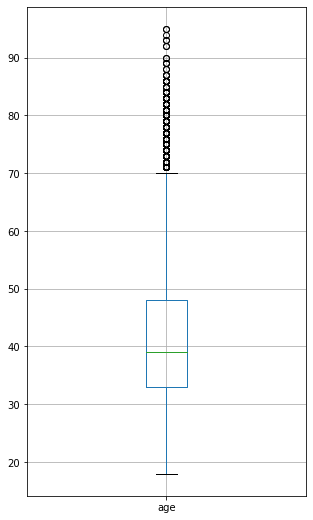

In [99]:
data.boxplot(
    column = ['age'],
    figsize=(5,9)
)

Berdasarkan hasil di atas, klien berusia lebih dari 70 tahun termasuk ke dalam outliers data. Sekarang, akan dihitung jumlah klien yang berusia lebih dari 70 tahun.

In [100]:
data[data['age']>70].count()

age          487
job          487
marital      487
education    487
default      487
balance      487
housing      487
loan         487
contact      487
day          487
month        487
duration     487
campaign     487
pdays        487
previous     487
poutcome     487
y            487
dtype: int64

Terdapat 487 klien berusia lebih dari 70 tahun. Sekarang, akan dilihat kecenderungan klien berusia lebih dari 70 tahun, apakah sebagian besar bergabung menjadi nasabah bank atau tidak.

In [101]:
data[(data['age']>70) & (data['y']=='yes')]['y'].count()

218

Berdasarkan hasil di atas, terlihat bahwa hampir 50% klien berusia lebih dari 70% bergabung menjadi nasabah bank. Maka dari itu, data klien berusia lebih dari 70 tahun tidak akan dihapus/diubah.

Di bawah ini akan dilihat outliers untuk data klien pada fitur balance, duration, campaign, pdays dan previous.

<AxesSubplot:>

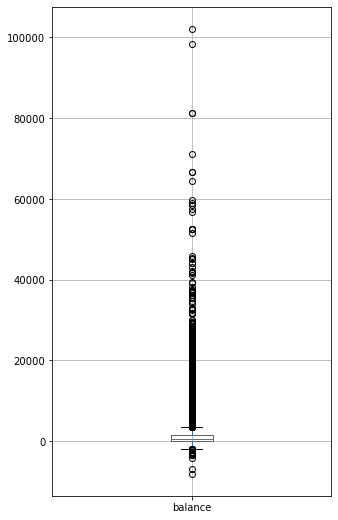

In [102]:
data.boxplot(
    column = ['balance'],
    figsize=(5,9)
)

<AxesSubplot:>

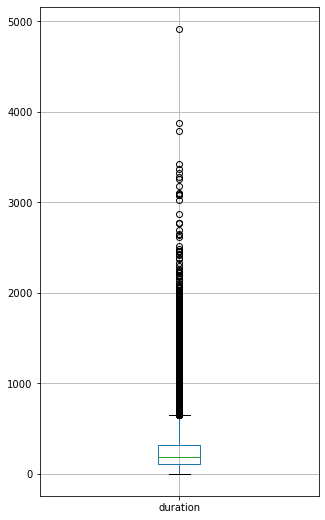

In [103]:
data.boxplot(
    column = ['duration'],
    figsize=(5,9)
)

<AxesSubplot:>

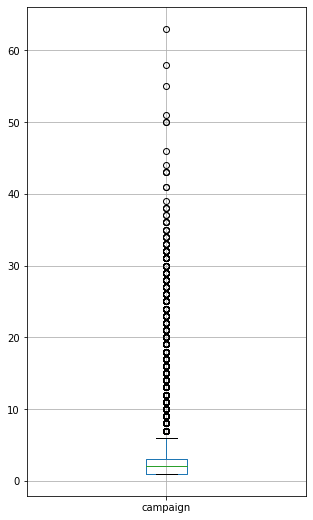

In [104]:
data.boxplot(
    column = ['campaign'],
    figsize=(5,9)
)

<AxesSubplot:>

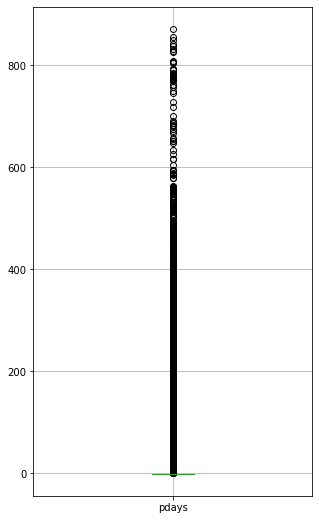

In [105]:
data.boxplot(
    column = ['pdays'],
    figsize=(5,9)
)

<AxesSubplot:>

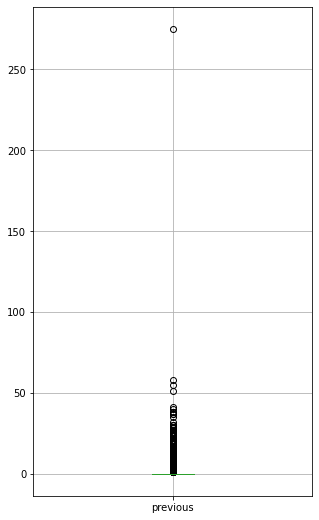

In [106]:
data.boxplot(
    column = ['previous'],
    figsize=(5,9)
)

Berdasarkan hasil di atas, terdapat satu data yang nilainya terlihat sangat jauh dari nilai data lainnya. Akan dilihat berapa banyak data tersebut.

In [107]:
data[data['previous']>250].count()

age          1
job          1
marital      1
education    1
default      1
balance      1
housing      1
loan         1
contact      1
day          1
month        1
duration     1
campaign     1
pdays        1
previous     1
poutcome     1
y            1
dtype: int64

Berdasarkan hasil di atas, terdapat satu data pada fitur previous yang nilainya sangat jauh dari nilai data lainnya. Maka, data ini akan dihapus.

In [108]:
outlier1_data = data[data['previous']>250].index
data.drop(outlier1_data, inplace=True)
data.shape

(45207, 17)

Berdasarkan hasil di atas, outlier data berhasil dihapus. Selanjutnya, data kategorik akan dipetakan ke dalam bentuk angka untuk mempermudah analisis. Adapun pemetaan setiap nilai dari data kategorik dapat dilihat seperti berikut.

In [109]:
data['month']= data['month'].replace({'jan':1, 'feb':2,'mar':3,'apr':4,'may':5,'jun':6, 'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
data['education'] = data['education'].replace({'primary':1,'secondary':2,'tertiary':3,'unknown':4})
data['marital'] = data['marital'].replace({'single':1,'married':2,'divorced':3})
data['housing'] = data['housing'].replace({'yes':1, 'no':0})
data['default'] = data['default'].replace({'yes':1, 'no':0})
data['loan'] = data['loan'].replace({'yes':1, 'no':0})
data['y'] = data['y'].replace({'yes':1, 'no':0}) # y merupakan variabel target

Selanjutnya, akan dilihat kecenderungan klien (berdasarkan pekerjaannya) terhadap keputusannya dalam memilih apakah mereka akan bergabung menjadi nasabah.

In [110]:
print(data.groupby(['y','job']).size())

y  job          
0  admin.           4540
   blue-collar      9024
   entrepreneur     1363
   housemaid        1131
   management       8155
   retired          1748
   self-employed    1392
   services         3785
   student           669
   technician       6756
   unemployed       1101
   unknown           254
1  admin.            631
   blue-collar       708
   entrepreneur      123
   housemaid         109
   management       1301
   retired           516
   self-employed     187
   services          369
   student           269
   technician        840
   unemployed        202
   unknown            34
dtype: int64


Sebagian besar klien dengan profesi apapun cenderung memutuskan untuk tidak menjadi nasabah bank ini.

In [111]:
print(data.groupby(['y','month']).size())

y  month
0  1         1261
   2         2207
   3          229
   4         2355
   5        12839
   6         4795
   7         6268
   8         5558
   9          310
   10         415
   11        3567
   12         114
1  1          142
   2          441
   3          248
   4          577
   5          925
   6          546
   7          627
   8          688
   9          269
   10         323
   11         403
   12         100
dtype: int64


Selanjutnya, data job akan dipetakan ke dalam bentuk angka untuk mempermudah analisis. Adapun pemetaan setiap nilai dari data kategorik dapat dilihat seperti berikut.

In [112]:
data['job']= data['job'].replace({'admin.':1, 'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6, 'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':12})

In [113]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,10,1,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,3,2,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,2,2,4,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,12,1,4,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


Selanjutnya, akan dilihat distribusi dari data untuk data numerik (age, balance, day).

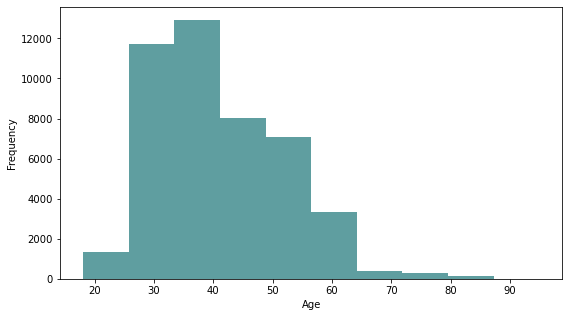

In [114]:
data['age'].plot(kind = 'hist', figsize=(9,5), color='cadetblue')

plt.xlabel('Age')

plt.show()

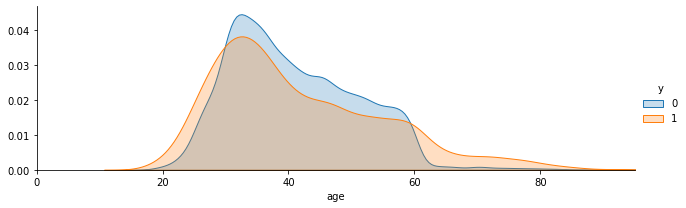

In [115]:
facet = sns.FacetGrid(data, hue="y", aspect = 3)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, data['age'].max()))
facet.add_legend()

plt.show()

Dari hasil di atas, terlihat bahwa data usia klien berdistribusi poisson. Adapun klien paling banyak berada pada rentang usia 30-40 tahun dengan jumlah orang yang tidak berlangganan layanan bank ini lebih banyak daripada jumlah orang yang memutuskan untuk berlangganan layanan bank.

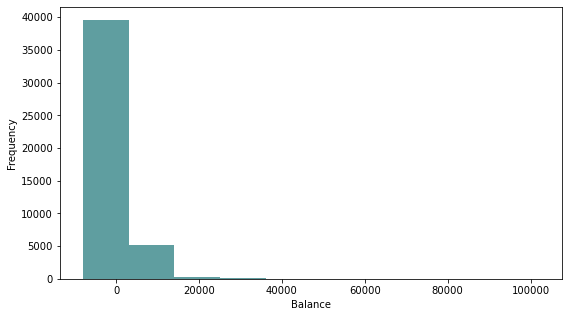

In [116]:
data['balance'].plot(kind = 'hist', figsize=(9,5), color='cadetblue')

plt.xlabel('Balance')

plt.show()

Dari hasil di atas, diketahui sebagian besar klien merupakan orang dengan balance berkisar antara 0-10000 (EUR).

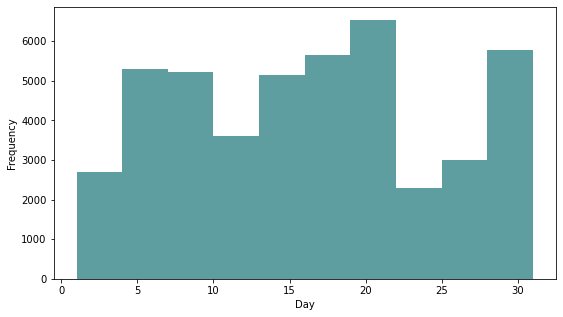

In [117]:
data['day'].plot(kind = 'hist', figsize=(9,5), color='cadetblue')

plt.xlabel('Day')

plt.show()

Selanjutnya, akan dibentuk grafik batang (bar) untuk melihat kecenderungan klien dalam memutuskan apakah mereka akan bergabung menjadi nasabah bank atau tidak berdasarkan status pernikahan, pendidikan terakhir, kepemilikan pinjaman atas rumah, kepemilikan kredit tak tuntas, dan kepemilikan pinjaman atas nama pribadi.

In [118]:
def bar_chart(feature):
    yes = data[data['y']==1][feature].value_counts()
    no = data[data['y']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes', 'No']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

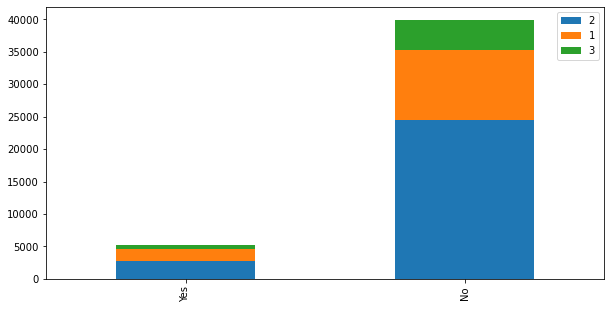

In [119]:
bar_chart('marital')

Berdasarkan status pernikahannya, baik kelompok klien yang memiliki status pernikahan belum menikah (1), sudah menikah (2), dan bercerai/janda/duda (3), semuanya memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank.

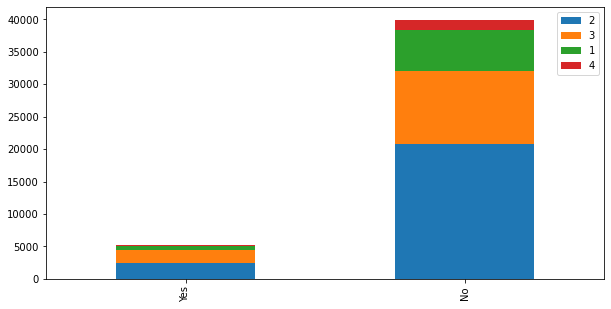

In [120]:
bar_chart('education')

Berdasarkan pendidikan terakhirnya, baik kelompok klien dengan pendidikan terakhir primary (1), secondary (2), tertiary (3), dan unknown (4), semuanya memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank.

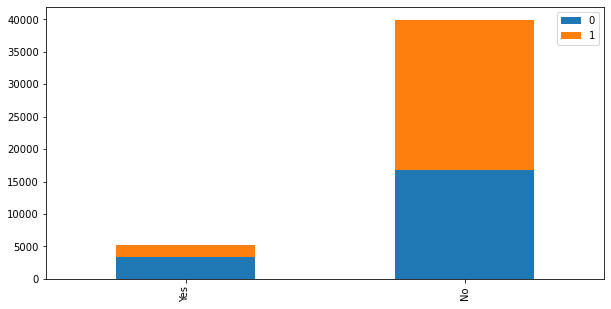

In [121]:
bar_chart('housing')

Berdasarkan kepemilikan pinjaman atas rumah, baik kelompok klien tanpa pinjaman atas rumah (0) maupun dengan pinjaman atas rumah (1) memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank.

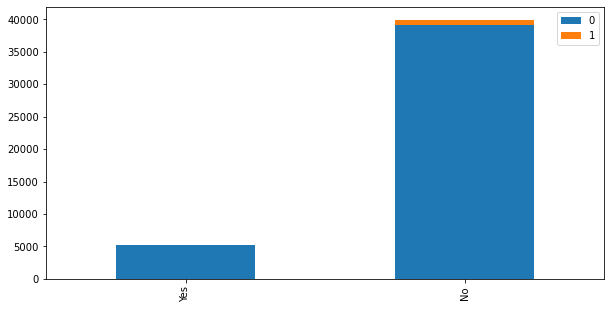

In [122]:
bar_chart('default')

Berdasarkan kepemilikan kredit tak tuntas, baik kelompok klien tanpa tanggungan kredit tak tuntas (0) maupun dengan tanggungan kredit tak tuntas (1) memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank. Namun, perlu diperhatikan bahwa sebagian besar klien bank pada dataset merupakan orang dengan tanggungan kredit tak tuntas. Akan lebih baik jika bank bisa menarik klien lebih banyak dari kelompok orang tanpa tanggungan kredit tak tuntas sehingga data untuk fitur ini tidak bersifat bias.

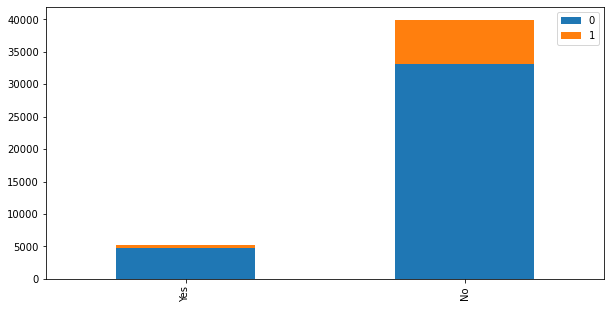

In [123]:
bar_chart('loan')

Berdasarkan kepemilikan pinjaman atas nama pribadi, baik kelompok klien tanpa pinjaman (0) maupun dengan pinjaman (1) memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank. Namun, perlu diperhatikan bahwa sebagian besar klien bank pada dataset merupakan orang dengan tanggungan pinjaman atas nama pribadi. Akan lebih baik jika bank bisa menarik klien lebih banyak dari kelompok orang tanpa pinjaman atas nama pribadi sehingga data untuk fitur ini tidak bersifat bias.

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45207 non-null  int64   
 1   job        45207 non-null  int64   
 2   marital    45207 non-null  int64   
 3   education  45207 non-null  int64   
 4   default    45207 non-null  int64   
 5   balance    45207 non-null  int64   
 6   housing    45207 non-null  int64   
 7   loan       45207 non-null  int64   
 8   contact    45207 non-null  category
 9   day        45207 non-null  int64   
 10  month      45207 non-null  int64   
 11  duration   45207 non-null  int64   
 12  campaign   45207 non-null  int64   
 13  pdays      45207 non-null  int64   
 14  previous   45207 non-null  int64   
 15  poutcome   45207 non-null  category
 16  y          45207 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.6 MB


## Data Preparation

Siapkan data: data training dan data testing.

In [125]:
data = data.drop(columns=['contact','poutcome'])

Fitur contact dihapus karena media kontak (cellular, telephone) tidak memiliki pengaruh terhadap keputusan klien untuk bergabung menjadi nasabah bank atau tidak. Selanjutnya, set data training dan data testing.

In [126]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =1)

# Logistic Regression

Lakukan konstruksi model Regresi Logistik dan training model.

In [127]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Hitung skor akurasi pada training data.

In [128]:
lr_score_train = lr.score(X_train,y_train)
print(lr_score_train)

0.8869488276065477


Dari hasil di atas, didapatkan akurasi model regresi logistik pada data training adalah 88.7%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [129]:
lr.fit(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
lr_score_test = lr.score(X_test,y_test)
print(lr_score_test)

0.8844452309325783


In [131]:
lr_pred = lr.predict(X_test)

In [132]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10922
           1       0.15      0.53      0.24       380

    accuracy                           0.88     11302
   macro avg       0.57      0.71      0.59     11302
weighted avg       0.95      0.88      0.91     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 89%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

# kNN

Lakukan konstruksi model kNN dan training model.

In [133]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

Hitung skor akurasi pada training data.

In [134]:
knn_score_train = knn.score(X_train, y_train)
print(knn_score_train)

0.9103377083026102


Dari hasil di atas, didapatkan akurasi model kNN pada data training adalah 88.62%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [135]:
knn.fit(X_test,y_test)

KNeighborsClassifier()

In [136]:
knn_score_test = knn.score(X_test, y_test)
print(knn_score_test)

0.9073615289329322


In [137]:
knn_pred = knn.predict(X_test)

In [138]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     10565
           1       0.38      0.69      0.49       737

    accuracy                           0.91     11302
   macro avg       0.68      0.81      0.72     11302
weighted avg       0.94      0.91      0.92     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 91%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

# SVM

Lakukan konstruksi model SVM dan training model.

In [139]:
svm = LinearSVC()
svm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

Hitung skor akurasi pada training data.

In [140]:
svm_score_train = svm.score(X_train, y_train)
print(svm_score_train)

0.8039817136115617


Dari hasil di atas, didapatkan akurasi model SVM pada data training adalah 88.09%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [141]:
svm.fit(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [142]:
svm_score_test = svm.score(X_test, y_test)
print(svm_score_test)

0.5819324013448947


In [143]:
svm_pred = svm.predict(X_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.98      0.69      5477
           1       0.91      0.21      0.34      5825

    accuracy                           0.58     11302
   macro avg       0.73      0.59      0.52     11302
weighted avg       0.73      0.58      0.51     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 88%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

# Decision Tree

Lakukan konstruksi model Decision Tree dan training model.

In [144]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Hitung skor akurasi pada training data.

In [145]:
dt_score_train = dt.score(X_train, y_train)
print(dt_score_train)

1.0


Dari hasil di atas, didapatkan akurasi model decision tree pada data training adalah 100%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [146]:
dt.fit(X_test,y_test)

DecisionTreeClassifier()

In [147]:
dt_score_test = dt.score(X_test,y_test)
print(dt_score_test)

1.0


In [148]:
dt_pred = dt.predict(X_test)

In [149]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9974
           1       1.00      1.00      1.00      1328

    accuracy                           1.00     11302
   macro avg       1.00      1.00      1.00     11302
weighted avg       1.00      1.00      1.00     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 100%. Di bawah ini, akan diperiksa dan dianalisis fitur mana saja yang sekiranya memiliki pengaruh paling besar pada model.

In [150]:
feature_imp = {'Feature': list(data.drop(columns='y').columns), 'Feature Importances': list(dt.feature_importances_)}
feature_imp = pd.DataFrame(feature_imp)
print(feature_imp)

      Feature  Feature Importances
0         age             0.125261
1         job             0.044601
2     marital             0.021975
3   education             0.031175
4     default             0.000874
5     balance             0.103029
6     housing             0.051629
7        loan             0.011093
8         day             0.096400
9       month             0.081889
10   duration             0.309566
11   campaign             0.035549
12      pdays             0.073010
13   previous             0.013950


Berdasarkan hasil di atas, 5 fitur dengan skor feature importances tertinggi secara berurutan adalah duration, balance, age, pdays, dan month. Adapun fitur dengan skor feature importances terendah adalah default.

# Random Forest

Lakukan konstruksi model Random Forest dan training model.

In [151]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Hitung skor akurasi pada training data.

In [152]:
rf_score_train = rf.score(X_train, y_train)
print(rf_score_train)

1.0


Dari hasil di atas, didapatkan akurasi model random forest pada data training adalah 100%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [153]:
rf.fit(X_test,y_test)

RandomForestClassifier()

In [154]:
rf_score_test = rf.score(X_test, y_test)
print(rf_score_test)

0.9999115200849407


In [155]:
rf_pred = rf.predict(X_test)

In [156]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9975
           1       1.00      1.00      1.00      1327

    accuracy                           1.00     11302
   macro avg       1.00      1.00      1.00     11302
weighted avg       1.00      1.00      1.00     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 100%. Sekarang, akan dicoba menggunakan Grid Search untuk menentukan parameter terbaik bagi model dan Cross Validation untuk memaksimalkan performa model.

In [72]:
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
            'criterion': ['gini', 'entropy'],
            'max_features': ['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy')
# recall binary

grid_rf.fit(X_train, y_train)
rf_score_train = grid_rf.score(X_train,y_train)
print(round(rf_score_train*100, 2))

100.0


In [73]:
rf_pred = grid_rf.predict(X_test)

In [74]:
grid_rf.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 80}

Didapatkan parameter terbaik yang dapat memaksimalkan performa model untuk data Portuguese Bank ini adalah
- criterion: 'gini'
- max_features: 'sqrt'
- n_estimators: 80

In [84]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10485
           1       0.39      0.63      0.48       817

    accuracy                           0.90     11302
   macro avg       0.68      0.78      0.71     11302
weighted avg       0.93      0.90      0.91     11302



Berdasarkan *classification report*, hasil yang didapat untuk skor akurasi masih baik. Namun, untuk precision, recall, dan f1-score kelas 1 ('yes') masih kurang baik.

Sekarang, implementasikan parameter terbaik yang telah didapat untuk melakukan Cross Validation.

In [81]:
kf = KFold(n_splits = 10, shuffle=True, random_state = 0)
kf.get_n_splits(X)

rf = RandomForestClassifier(n_estimators= 80, criterion='gini', max_features='sqrt')

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      4189
           1       0.41      0.67      0.51       332

    accuracy                           0.90      4521
   macro avg       0.69      0.80      0.73      4521
weighted avg       0.93      0.90      0.91      4521

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      4199
           1       0.38      0.64      0.47       322

    accuracy                           0.90      4521
   macro avg       0.67      0.78      0.71      4521
weighted avg       0.93      0.90      0.91      4521

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4187
           1       0.41      0.65      0.51       334

    accuracy                           0.91      4521
   macro avg       0.69      0.79      0.73      4521
weighted avg       0.93      0.91      0.92      4521

              preci

Berdasarkan *classification report*, hasil yang didapat untuk skor akurasi masih baik. Namun, untuk precision, recall, dan f1-score kelas 1 ('yes') masih kurang baik.

# Naive Bayes

Lakukan konstruksi model naive bayes dan training model.

In [157]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Hitung skor akurasi pada training data.

In [158]:
nb_score_train = nb.score(X_train, y_train)
print(nb_score_train)

0.8648871847810058


Dari hasil di atas, didapatkan akurasi model naive bayes pada data training adalah 86.25%. Selanjutnya, implementasikan model pada data testing dan hitung skor akurasinya.

In [159]:
nb.fit(X_test,y_test)

GaussianNB()

In [160]:
nb_score_test = nb.score(X_test, y_test)
print(nb_score_test)

0.8694921252875597


In [161]:
nb_pred = nb.predict(X_test)

In [162]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10079
           1       0.41      0.44      0.42      1223

    accuracy                           0.87     11302
   macro avg       0.67      0.68      0.67     11302
weighted avg       0.87      0.87      0.87     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 87%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

Sekarang, akan dicoba menggunakan Grid Search untuk menentukan parameter terbaik bagi model dan Cross Validation untuk memaksimalkan performa model.

In [163]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb = GaussianNB()
grid_nb = GridSearchCV(nb, param_grid=param_grid, scoring='accuracy')
# recall binary

grid_nb.fit(X_train, y_train)
nb_score_train = grid_nb.score(X_train,y_train)
print(round(nb_score_train*100, 2))

88.23


Berdasarkan hasil di atas, didapat skor akurasi training model yang lebih baik, yaitu 88%. Selanjutnya, implementasikan model pada data test.

In [164]:
nb_pred = grid_nb.predict(X_test)
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     10707
           1       0.21      0.46      0.29       595

    accuracy                           0.88     11302
   macro avg       0.59      0.68      0.61     11302
weighted avg       0.93      0.88      0.90     11302



Berdasarkan hasil dan tabel *classification_report* di atas, didapatkan hasil akurasi model yang cukup baik yaitu 88%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

In [165]:
grid_nb.best_params_

{'var_smoothing': 0.0015199110829529332}

Adapun parameter terbaik untuk digunakan model ini dalam memprediksi dataset Portuguese Bank adalah *var_smoothing: 0.0015199110829529332.*

Selanjutnya, implementasikan parameter terbaik yang telah didapat untuk melakukan Cross Validation.

In [166]:
kf = KFold(n_splits = 10, shuffle=True, random_state = 0)
kf.get_n_splits(X)

nb = GaussianNB(var_smoothing= 0.0015199110829529332)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4291
           1       0.21      0.51      0.30       230

    accuracy                           0.88      4521
   macro avg       0.59      0.71      0.62      4521
weighted avg       0.93      0.88      0.90      4521

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      4263
           1       0.25      0.53      0.34       258

    accuracy                           0.88      4521
   macro avg       0.61      0.72      0.64      4521
weighted avg       0.93      0.88      0.90      4521

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4267
           1       0.26      0.52      0.34       254

    accuracy                           0.89      4521
   macro avg       0.61      0.72      0.64      4521
weighted avg       0.93      0.89      0.90      4521

              preci

Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 89%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

# Model Evaluation

Akan dibentuk tabel evaluasi model dengan skor akurasi sesuai hasil yang telah didapat sebagai berikut.

In [167]:
mod_eval = {'Model': ['Logistic Regression', 'kNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM'], 
            'Training':[lr_score_train, knn_score_train, nb_score_train, dt_score_train, rf_score_train, svm_score_train], 
            'Test': [lr_score_test, knn_score_test, nb_score_test, dt_score_test, rf_score_test, svm_score_test]}
mod_eval = pd.DataFrame(mod_eval)
mod_eval

,Model,Training,Test
0,Logistic Regression,0.886949,0.884445
1,kNN,0.910338,0.907362
2,Naive Bayes,0.882259,0.869492
3,Decision Tree,1.000000,1.000000
4,Random Forest,1.000000,0.999912
5,SVM,0.803982,0.581932


# Confusion Matrix

Selanjutnya dibentuk confusion matrix sebagai berikut.

In [169]:
confusion_matrix(y_test, y_pred)

array([[3901,  112],
       [ 390,  117]], dtype=int64)

Berdasarkan hasil di atas, didapat hasil bahwa terdapat sekitar 4000 data yang memiliki hasil prediksi tepat dan 500 data yang hasil prediksinya tidak tepat.

# Kesimpulan
Belum dapat ditentukan model apa yang paling baik untuk memprediksi dataset Portuguese Bank karena mayoritas hasil akurasi baik, namun precision, recall, dan f1-score untuk salah satu kelas variabel target masih kurang baik. Hal ini bisa saja disebabkan oleh ketidakseimbangan data target (imbalance data) sehingga diperlukan eksplorasi yang lebih mendalam terhadap data pada tahap EDA.